In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# Classification

### 이진 분류기 훈련

In [2]:
# import tensorflow as tf

# Download the mnist dataset using keras
data_train = pd.read_csv('./sign_mnist_train.csv')
data_test = pd.read_csv('./sign_mnist_test.csv')

# Parse images and labels
labels_train = np.array(data_train['label'])
images_train = np.array(data_train.drop('label',1))

labels_test = np.array(data_test['label'])
images_test = np.array(data_test.drop('label',1))

In [3]:
images_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]], dtype=int64)

In [4]:
X_train, y_train = images_train.reshape(-1,28*28), labels_train
X_test, y_test = images_test.reshape(-1,28*28), labels_test
X_train.shape

(27455, 784)

In [5]:
y_train.shape

(27455,)

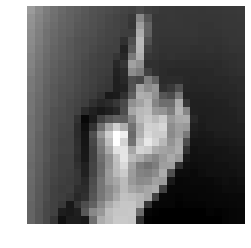

In [6]:
first_digit = X_train[0]
first_digit_image = first_digit.reshape(28, 28)
plt.imshow(first_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [7]:
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

In [8]:
y_train[0]

3

In [9]:
# For binary classification: 3 vs Not 3
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [10]:
y_train_3

array([ True, False, False, ..., False, False, False])

In [11]:
X_train = X_train[:5000,:]
y_train_3 = y_train_3[:5000]

In [12]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train_3)
svc.predict([first_digit])

array([ True])

### 성능 측정

In [13]:
y_train_pred = svc.predict(X_train)

In [14]:
y_train_pred

array([ True, False, False, ..., False, False, False])

In [15]:
from sklearn.metrics import confusion_matrix

# Rows: represent true labels
# Columns: represent predicted labels
print("[True Negative,   False Positive]\n[False Negative,  True Positive]\n")
C = confusion_matrix(y_train_3, y_train_pred)
C

[True Negative,   False Positive]
[False Negative,  True Positive]



array([[4775,    0],
       [  10,  215]], dtype=int64)

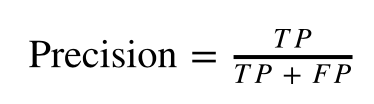

In [16]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_3, y_train_pred)

1.0

In [17]:
# Precision = TP/(TP+FP)
C[1][1] / (C[0][1] + C[1][1])

1.0

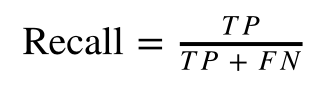

In [18]:
recall_score(y_train_3, y_train_pred)

0.9555555555555556

In [19]:
# Recall = TP/(TP+FN)
C[1][1] / (C[1][0] + C[1][1])

0.9555555555555556

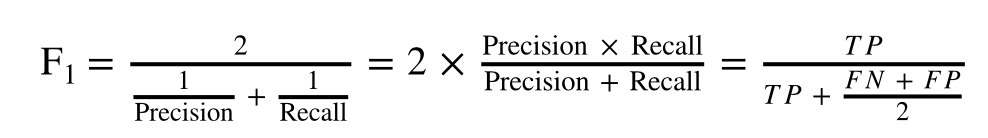

In [20]:
from sklearn.metrics import f1_score

f1_score(y_train_3, y_train_pred)

0.9772727272727273

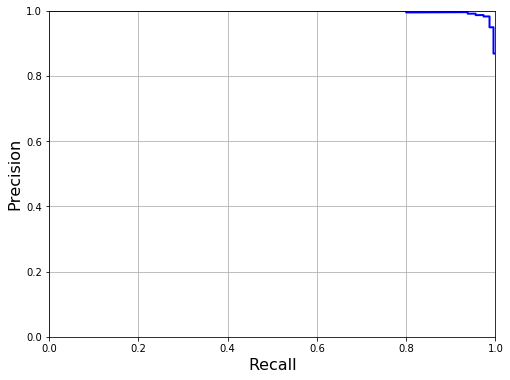

In [21]:
# precision, recall의 trade-off
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_val_predict

y_scores = cross_val_predict(svc, X_train, y_train_3, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

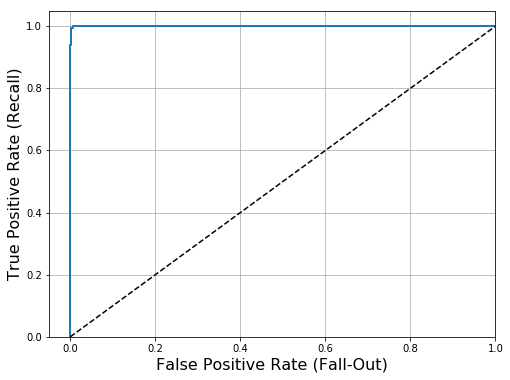

In [22]:
from sklearn.metrics import roc_curve

# TPR = recall
# FPR = FP/(FP+TN) = Fall-Out
fpr, tpr, thresholds = roc_curve(y_train_3, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([-0.05, 1, 0, 1.05])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_3, y_scores)

0.9998873763816173

## Regression

In [24]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

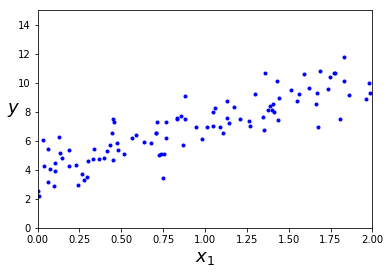

In [25]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [27]:
lin_reg.intercept_, lin_reg.coef_

(array([3.9065364]), array([[3.25635988]]))

In [28]:
X_new = np.array([[0], [2]])

In [29]:
X_new

array([[0],
       [2]])

In [30]:
y_predict = lin_reg.predict(X_new)

In [31]:
y_predict

array([[ 3.9065364 ],
       [10.41925615]])

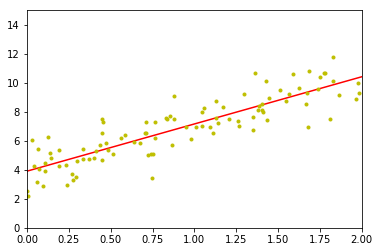

In [32]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.show()

## Lasso

In [33]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [34]:
y_predict_lasso = lasso_reg.predict(X_new)

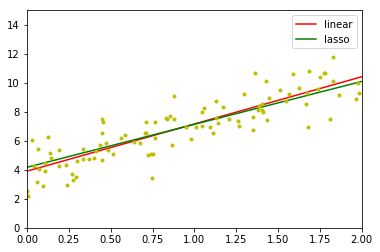

In [35]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X_new, y_predict_lasso, "g-", label="lasso")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

## Ridge

In [36]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
y_predict_ridge = ridge_reg.predict(X_new)

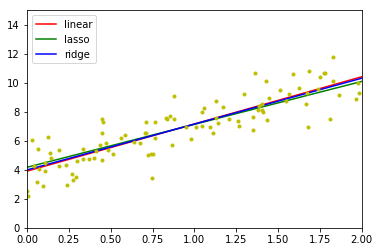

In [37]:
plt.plot(X_new, y_predict, "r-", label="linear")
plt.plot(X_new, y_predict_lasso, "g-", label="lasso")
plt.plot(X_new, y_predict_ridge, "b-", label="ridge")
plt.plot(X, y, "y.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

## Multiple Linear Regression

출처: https://www.kaggle.com/goyalshalini93/car-data

In [38]:
car = pd.read_csv("./CarPrice.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [39]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [40]:
car = car[['carlength','carwidth','boreratio','price']]

In [41]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(car, test_size=0.2, random_state=42)

In [42]:
X_train, y_train = train_set[['carlength','carwidth','boreratio']], train_set['price']
X_train = np.array(X_train)
y_train = np.array(y_train)

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [44]:
X_test, y_test = test_set[['carlength','carwidth','boreratio']], test_set['price']
X_test = np.array(X_test)
y_test = np.array(y_test)

In [45]:
lin_reg.predict(X_test)

array([17536.92681088, 16537.03549167, 11672.22893298, 16120.25468234,
       24814.26974207,  7324.12455785,  9373.3433524 ,  8897.68934473,
       13838.23606845, 10383.90652953, 14750.30489734,  8082.11574512,
       16246.84975018, 14465.27238242, 29645.86330848,  6110.08261885,
       -2428.21598614, 15568.73446757, 12204.15608976, 13799.03465555,
       14998.42179566, 15338.17247301,  7240.49487702,  5567.91671943,
        6036.98855593, 19858.11098272, 14347.94654177, 19141.72986635,
        7444.34222405, 19141.72986635, 24814.26974207,  6036.98855593,
        6397.55964671, 21685.35225318,  6393.72906168, 24725.41320618,
       13799.03465555, 12655.10794714,  5917.9931462 , 15628.19121853,
       13838.23606845])

In [46]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test)
y_true = y_test
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

5329.013814800543

In [47]:
from sklearn.metrics import mean_absolute_error

y_pred = lin_reg.predict(X_test)
y_true = y_test
mae = mean_absolute_error(y_true, y_pred)
mae

3486.2076498228935